In [116]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from IPython.display import Image
from IPython.display import display
import os.path

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams.update({'font.size': 12})

def csv_read(file_name):
    return genfromtxt(file_name, delimiter=' ')

def load_stat(data, max_size):
    data_valid = []
    for x in data:
        if os.path.isfile(x + '.csv'):
            data_valid.append(x)
        else:
            print(x + '.csv is not found.')
    
    stat = np.zeros((len(data_valid), max_size, 4))
    idx = 0
    for x in data_valid:
        log = csv_read(x + '.csv')
        #opt = csv_read(opt_path)
        for i in range(0, max_size):
            stat[idx][i][0] = log[i][1]
            stat[idx][i][1] = log[i][2]
            stat[idx][i][2] = log[i][3]
            stat[idx][i][3] = log[i][4] # - opt[i][4]
        idx = idx + 1
    return stat.mean(0), stat.std(0) / (np.sqrt(len(data_valid)) * np.sqrt(len(data_valid)))

def plot_curve(ax, mean, std, color, label, linestyle, marker, step=1):
    #ax.fill_between(range(1, mean.size+1, step), mean[0:mean.size:step]-std[0:mean.size:step], 
    #                mean[0:mean.size:step]+std[0:mean.size:step], 
    #                facecolor=color, interpolate=True, alpha=0.15, edgecolor='lightgrey', linewidth=0.5)
    
    ax.plot(range(1, mean.size+1, step), mean[0:mean.size:step], 
                    color=color, label=label, marker=marker, linestyle=linestyle, markersize=4, alpha=1, linewidth=2.5)
    
def format_plot(ax, fig, max_size):
    ax.set_xlabel('Num of instructions', fontsize=12)
    ax.relim()
    ax.autoscale_view()
    ax.set_xlim(0, max_size)
    ax.grid(which='both', alpha=0.6)
    ax.grid(which='both', alpha=0.6)
    # ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles, labels, loc=4, prop={'size':12}, labelspacing=0.1, borderpad=0.1)
    fig.tight_layout()
        
def plot_error(figs, axes, data, max_size, color, label, linestyle, marker):
    mean, std = load_stat(data, max_size)
    idx = 0
    for ax in axes:
        plot_curve(ax, mean[:,idx], std[:,idx], color, label, linestyle, marker)
        format_plot(ax, figs[idx], max_size)
        idx = idx + 1
    
    print(label, '%.1f (%.2f)' % (mean[max_size-1, 0], std[max_size-1, 0]), 
                 '%.1f%% (%.2f)' % (mean[max_size-1, 1] * 100, std[max_size-1, 1] * 100))

def create_plot():    
    fig, ax = plt.subplots(1)
    fig.set_size_inches(3, 3)
    return fig, ax

color = []
# color.append('gray')
color.append('royalblue')
color.append('limegreen')
color.append('coral')
color.append('gold')
color.append('lightpink')

In [117]:
max_size = 20
fig1, ax1 = create_plot()
fig2, ax2 = create_plot()
fig3, ax3 = create_plot()
fig4, ax4 = create_plot()
#opt_path = 'no_penalty/opt_all_seen.csv'

ta_seen = ['csv/ta_seen', 'csv/ta2_seen', 'csv/ta3_seen', 'csv/ta4_seen']
ta_unseen = ['csv/ta_unseen', 'csv/ta2_unseen', 'csv/ta3_unseen', 'csv/ta4_unseen']
open_seen = ['csv/open_seen']
open_unseen = ['csv/open_unseen']
nta_seen = ['csv/nta_seen', 'csv/nta2_seen', 'csv/nta3_seen']
nta_unseen = ['csv/nta_unseen', 'csv/nta2_unseen', 'csv/nta3_unseen']
flat_seen = ['csv/flat_seen', 'csv/flat2_seen']
flat_unseen = ['csv/flat_unseen', 'csv/flat2_seen']


only_seen = False

if only_seen:
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], flat_seen, max_size, color[3], "Flat", "-", "")
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], nta_seen, max_size, color[1], "Ours w/o TA", "-", "")
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], ta_seen, max_size, color[0], "Ours w/ TA", "-", "")
else:
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], flat_seen, max_size, color[3], "Flat (Seen)", "-", "")
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], flat_unseen, max_size, color[3], "Flat (Unseen)", "--", "")
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], open_seen, max_size, color[2], "Hierarchical-Long (Seen)", "-", "")
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], open_unseen, max_size, color[2], "Hierarchical-Long (Unseen)", "--", "")
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], nta_seen, max_size, color[1], "Hierarchical-Short (Seen)", "-", "")
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], nta_unseen, max_size, color[1], "Hierarchical-Short (Unseen)", "--", "")
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], ta_seen, max_size, color[0], "Hierarchical-Dynamic (Seen)", "-", "")
    plot_error([fig1, fig2, fig3, fig4], [ax1, ax2, ax3, ax4], ta_unseen, max_size, color[0], "Hierarchical-Dynamic (Unseen)", "--", "")


ax1.set_ylabel('Reward', fontsize=12)
ax2.set_ylabel('Success rate', fontsize=12)
ax3.set_ylabel('#instructions completed', fontsize=12)
ax4.set_ylabel('#steps', fontsize=12)

ax1.set_xlim(1, max_size)
ax2.set_xlim(1, max_size)
ax3.set_xlim(1, max_size)
ax4.set_xlim(1, max_size)
#ax2.set_ylim(0.8, 1)

#handles, labels = ax1.get_legend_handles_labels()
#ax1.legend(handles, labels, loc=4, prop={'size':10}, labelspacing=0.1, borderpad=0.1)
figLegend = plt.figure(figsize = (3,0.7))
plt.figlegend(*ax1.get_legend_handles_labels(), loc = 'upper left')

figLegend.savefig('plot/3d_legend.png', bbox_inches='tight')
figLegend.savefig('plot/3d_legend.pdf', bbox_inches='tight')

fig1.savefig('plot/3d_reward.png', bbox_inches='tight')
fig1.savefig('plot/3d_reward.pdf', bbox_inches='tight')
fig2.savefig('plot/3d_success.png', bbox_inches='tight')
fig2.savefig('plot/3d_success.pdf', bbox_inches='tight')
fig3.savefig('plot/3d_instructions.png', bbox_inches='tight')
fig3.savefig('plot/3d_instructions.pdf', bbox_inches='tight')
fig4.savefig('plot/3d_step.png', bbox_inches='tight')
fig4.savefig('plot/3d_step.pdf', bbox_inches='tight')

plt.close()

('Flat (Seen)', '-63.1 (0.16)', '0.0% (0.00)')
('Flat (Unseen)', '-62.2 (0.30)', '0.0% (0.00)')
('Hierarchical-Long (Seen)', '-60.8 (0.00)', '0.0% (0.00)')
('Hierarchical-Long (Unseen)', '-60.5 (0.00)', '0.0% (0.00)')
('Hierarchical-Short (Seen)', '-53.4 (4.71)', '22.6% (10.64)')
('Hierarchical-Short (Unseen)', '-53.6 (3.28)', '18.0% (8.47)')
('Hierarchical-Dynamic (Seen)', '-30.3 (0.28)', '75.4% (0.73)')
('Hierarchical-Dynamic (Unseen)', '-38.0 (0.56)', '56.0% (1.59)')


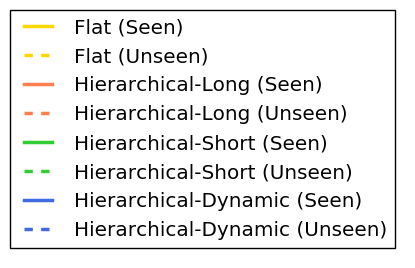

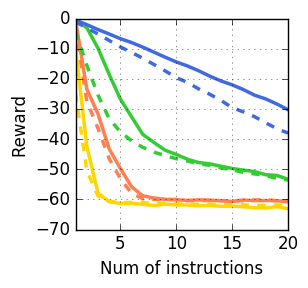

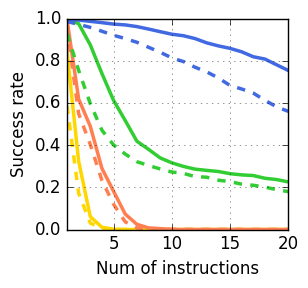

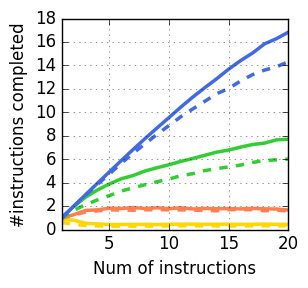

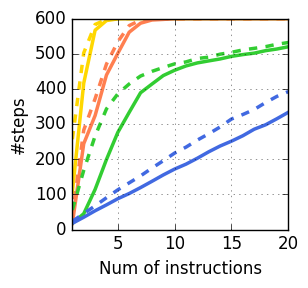

In [118]:
a = Image(filename='plot/3d_legend.png') 
b = Image(filename='plot/3d_reward.png') 
c = Image(filename='plot/3d_success.png') 
d = Image(filename='plot/3d_instructions.png') 
e = Image(filename='plot/3d_step.png') 
display(a, b, c, d, e)